In [2]:
import pandas as pd
import numpy as np
from seaborn import heatmap, PairGrid, kdeplot
import matplotlib.pyplot as pl
from sklearn.decomposition import PCA
from scripts.notebook_utils import *

#### Load Dataset for aphy prediction

In [4]:
df = pd.read_pickle('../PickleJar/Interim/df_4_ML4aph.pkl')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 494
Data columns (total 18 columns):
oisst            495 non-null float64
etopo2           495 non-null float64
solz             495 non-null float64
sat_rho_rc412    495 non-null float64
sat_rho_rc443    495 non-null float64
sat_rho_rc490    495 non-null float64
sat_rho_rc510    495 non-null float64
sat_rho_rc555    495 non-null float64
sat_rho_rc670    495 non-null float64
datetime         495 non-null datetime64[ns]
lat              495 non-null float64
lon              495 non-null float64
aphy411          165 non-null float64
aphy443          167 non-null float64
aphy489          167 non-null float64
aphy510          167 non-null float64
aphy555          165 non-null float64
aphy670          167 non-null float64
dtypes: datetime64[ns](1), float64(17)
memory usage: 73.5 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
oisst,495.0,19.066020,6.983298,0.78000,13.775000,19.600000,25.120000,30.510000
etopo2,495.0,768.961616,1410.753061,0.00000,20.500000,156.000000,519.000000,5529.000000
solz,495.0,31.291919,14.525706,0.00000,20.650000,32.300000,42.600000,69.900000
sat_rho_rc412,495.0,0.006742,0.003876,0.00000,0.003706,0.005988,0.008865,0.020979
sat_rho_rc443,495.0,0.007025,0.003640,0.00000,0.004168,0.006625,0.008941,0.020130
sat_rho_rc490,495.0,0.007243,0.003453,0.00000,0.004514,0.006866,0.009144,0.018906
sat_rho_rc510,495.0,0.006734,0.003350,0.00000,0.004123,0.005819,0.008748,0.018512
sat_rho_rc555,495.0,0.006170,0.003526,0.00000,0.003430,0.005138,0.007997,0.019804
sat_rho_rc670,495.0,0.003537,0.002458,0.00000,0.001666,0.002724,0.004723,0.011320
lat,495.0,28.887491,20.588358,-67.64300,26.936900,32.400000,42.350000,79.000000


In [7]:
sat_cols = df.filter(regex='sat').columns.tolist()

In [8]:
df.loc[df.sat_rho_rc412==0, sat_cols] = np.NaN

In [9]:
df[sat_cols] = df[sat_cols].replace(0.000, np.NaN)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
oisst,495.0,19.066020,6.983298,0.780000,13.775000,19.600000,25.120000,30.510000
etopo2,495.0,768.961616,1410.753061,0.000000,20.500000,156.000000,519.000000,5529.000000
solz,495.0,31.291919,14.525706,0.000000,20.650000,32.300000,42.600000,69.900000
sat_rho_rc412,494.0,0.006756,0.003868,0.001360,0.003726,0.005999,0.008869,0.020979
sat_rho_rc443,494.0,0.007039,0.003629,0.001656,0.004210,0.006646,0.008943,0.020130
sat_rho_rc490,494.0,0.007258,0.003441,0.001897,0.004528,0.006869,0.009147,0.018906
sat_rho_rc510,494.0,0.006747,0.003339,0.001890,0.004140,0.005863,0.008762,0.018512
sat_rho_rc555,494.0,0.006182,0.003519,0.001690,0.003433,0.005139,0.008000,0.019804
sat_rho_rc670,494.0,0.003545,0.002455,0.000531,0.001682,0.002747,0.004736,0.011320
lat,495.0,28.887491,20.588358,-67.643000,26.936900,32.400000,42.350000,79.000000


In [12]:
df.iloc[174]

oisst                           29.9
etopo2                            42
solz                            20.3
sat_rho_rc412                    NaN
sat_rho_rc443                    NaN
sat_rho_rc490                    NaN
sat_rho_rc510                    NaN
sat_rho_rc555                    NaN
sat_rho_rc670                    NaN
datetime         2001-08-28 20:05:00
lat                           27.236
lon                          -83.469
aphy411                      0.01085
aphy443                      0.01395
aphy489                      0.00831
aphy510                      0.00403
aphy555                      0.00065
aphy670                      0.00179
Name: 174, dtype: object

In [13]:
pca = PCA() # Instantiate PCA transformer
df_sat = df.filter(regex='sat').dropna()
data = df_sat.divide(df_sat.sum(axis=1), axis=0)

#### PCA of bandwise normalized data
<br>
Plot above shows explained variance of each principled component, along with cumulative variance
<br><br>
Plot below shows relation of original input to each PC

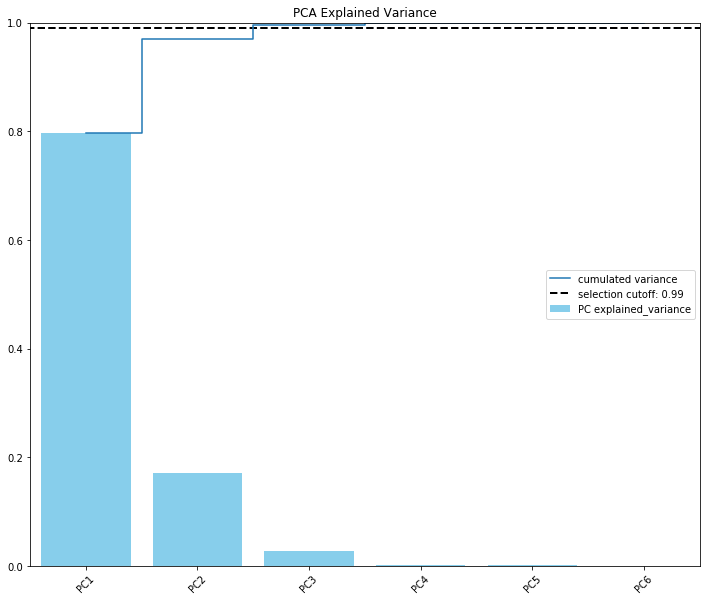

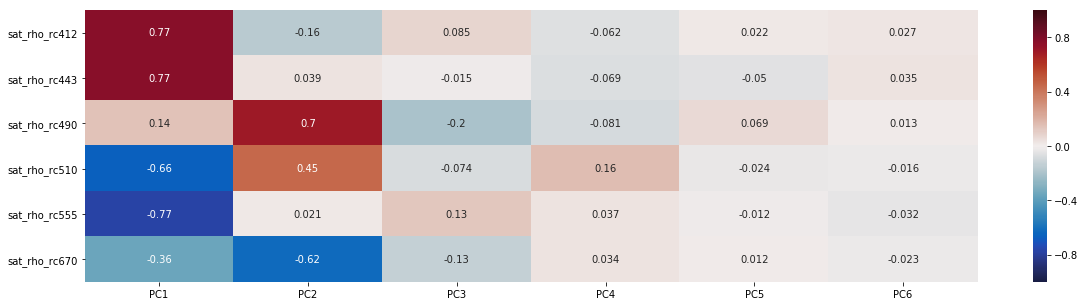

In [22]:
df_pca = pd.DataFrame(pca.fit_transform(data),
                        columns=[f'PC{i+1}' for i in range(data.shape[1])])
plot_pca_res(pca, threshold=0.99, alpha=0.9, num_pca_disp=pca_data.shape[1])
plot_cross_corr(df_pca, data)

In [26]:
df_pca.corr()

,PC1,PC2,PC3,PC4,PC5,PC6
PC1,1.000000e+00,9.463558e-17,-1.128101e-17,-1.845526e-17,-7.856622e-17,5.033957e-17
PC2,9.463558e-17,1.000000e+00,-2.598457e-16,4.868062e-18,1.967859e-16,7.816211e-18
PC3,-1.128101e-17,-2.598457e-16,1.000000e+00,-7.235618e-17,2.187658e-16,-1.917063e-16
PC4,-1.845526e-17,4.868062e-18,-7.235618e-17,1.000000e+00,2.467448e-16,4.357341e-16
PC5,-7.856622e-17,1.967859e-16,2.187658e-16,2.467448e-16,1.000000e+00,3.072409e-16
PC6,5.033957e-17,7.816211e-18,-1.917063e-16,4.357341e-16,3.072409e-16,1.000000e+00


#### Illustrating how PCA solved the inter-input correlation problem

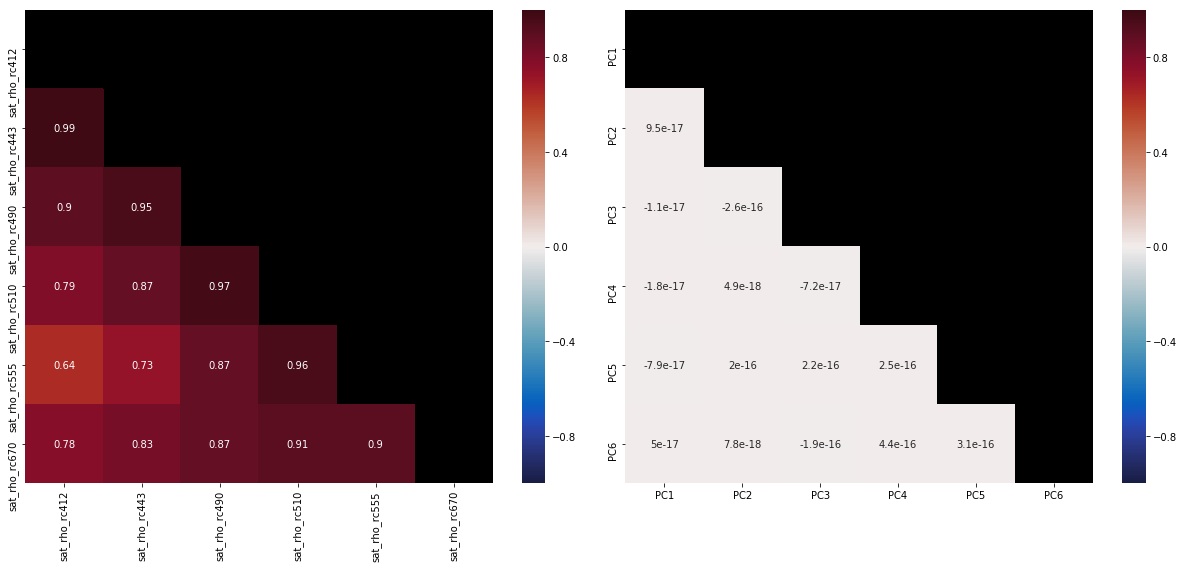

In [29]:
f, axs = pl.subplots(ncols=2,figsize=(17, 8))
for axi in axs:
    axi.set_facecolor('black')
heatmap(df_sat.corr(), vmin=-1, vmax=1, cmap=cmo.balance, annot=True,
       mask=np.triu(np.ones([df_sat.shape[1]]*2)), ax=axs[0])
heatmap(df_pca.corr(), vmin=-1, vmax=1, cmap=cmo.balance, annot=True,
       mask=np.triu(np.ones([df_sat.shape[1]]*2)), ax=axs[1]);
ax[0].set_xticklabels(['']*6)
f.tight_layout()

In [30]:
# reinserting Nan line 
df_pca.loc[174] = [np.NaN] * 6
df_pca.sort_index(inplace=True)

In [31]:
# verify
df_pca.iloc[172:178]

,PC1,PC2,PC3,PC4,PC5,PC6
172,0.042179,-0.028720,-0.000202,0.003095,0.000890,2.003778e-17
173,0.038200,-0.030585,-0.000523,0.003317,0.000786,3.591620e-17
174,NaN,NaN,NaN,NaN,NaN,NaN
175,0.027936,-0.027678,-0.003713,0.002157,0.001255,3.873667e-17
176,0.014648,-0.028097,-0.004612,0.002626,0.001283,1.052328e-17
177,0.014117,-0.024558,-0.004897,0.002983,0.002100,-1.354170e-17


In [32]:
df_pca.to_pickle('../PickleJar/Interim/df_pca.pkl')